### Chapter 2 Training Simple Machine Learning Algorithms for Classification

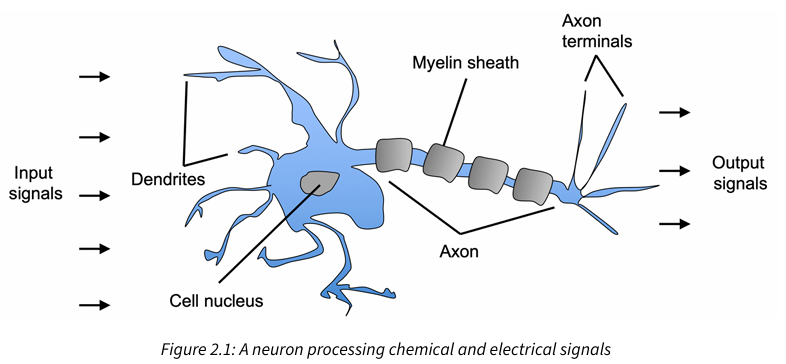

Inputs via dendrites to nucleus, with binary output

The perceptron learning rule

Use a reductionist approach to mmic how a single neuron in the brain works, it either fires or it doesnt

* Initialze the weights and bias uniit to 0 or small random numbers
* For each training example, x
  * Compute the output value, y
  * Update the weights and bias unit

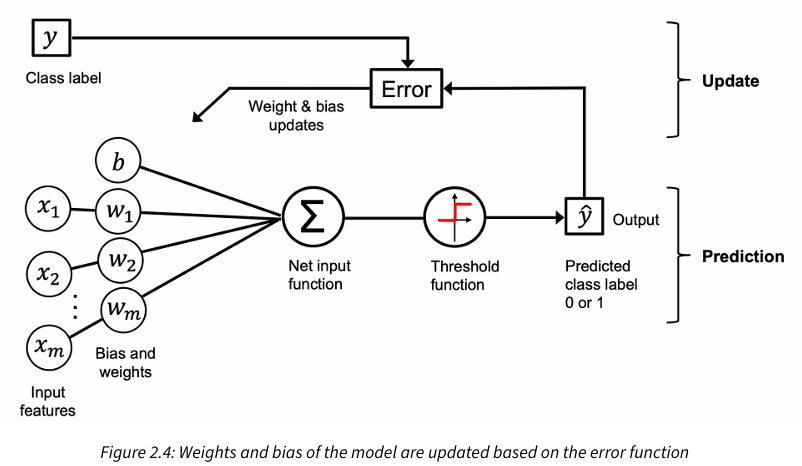


In [1]:
# Perceptron in Python
import numpy as np
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = [] # when you add _ to the end of a variable name, it means that it is a private variable
        
        for _ in range(self.n_iter): # _ is a throwaway variable
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

We should now be able to initialize new Perceptron objects. 

In [2]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) *
    np.linalg.norm(v2)))

0.0

Training a perceptron model on the Iris Dataset

This is easy, read data from the web, load it as a CSV into the pandas dataframe

You can read local datasets as well with 
```
df = pd.read_csv('your/local/path/to/iris.data', header=None, encoding='utf-8')```

In [3]:
import os
import pandas as pd

# Load data from the url into a pandas dataframe (df) then display the last 5 rows
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()



From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Extract the first 100 class labels for 50 Iris-setosa (0) and 50 Iris-versicolor (1) flowers

Convert the class labels into two integer class labels 

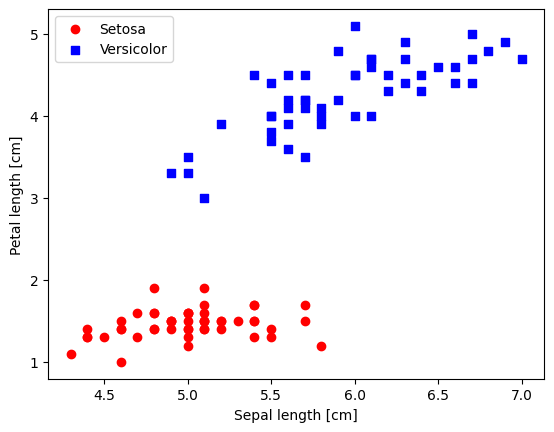

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# select setosa and versicolor
# iloc is a pandas function that selects rows and columns by number, 4 is the column number
y = df.iloc[0:100, 4].values
# where is a numpy function that returns the indices of elements in an input array where the given condition is satisfied
y = np.where(y == 'Iris-setosa', 0, 1)
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Train the Perceptron algorithm on the Iris data subset

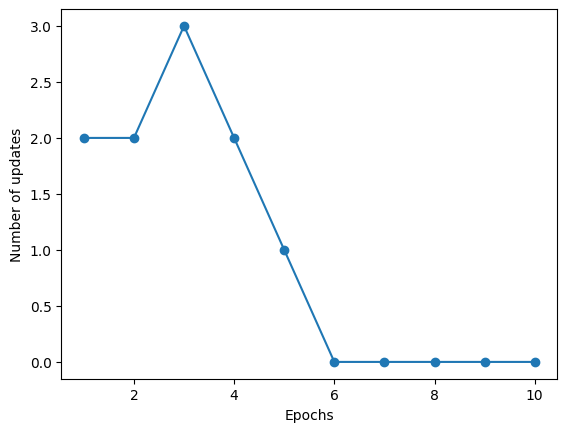

In [5]:
# eta is the learning rate, n_iter is the number of iterations
ppn = Perceptron(eta=0.1, n_iter=10)
# fit is a function that trains the model, X is the input data, y is the target data
ppn.fit(X, y)
# plot the number of errors in each iteration
# ppn.errors_ has a _ at the end because it is a private variable
# private variables are not supposed to be accessed directly
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Implement a convenience function to visualize the decision boundary

In [6]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier. predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}',
                    edgecolor='black')

Lets plot with matplotlib

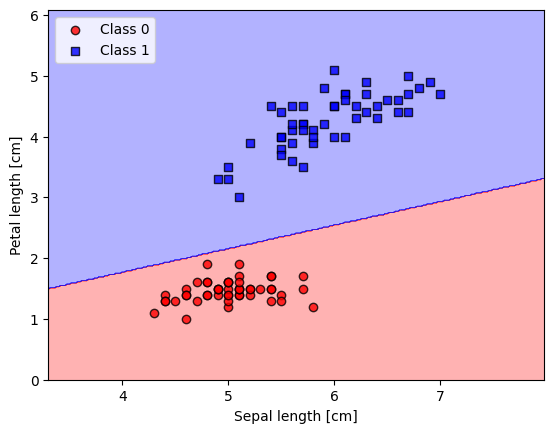

In [7]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Convergence is a problem with Perceptron. It will learn the bounaries if the data can be separated perfectly by a linear line. If it cannot then Perceptron will run forever if a set number of epochs is not specified.

### Minimize loss functions with gradient descent

* Objective Funtion
  * A function in supervised ML that is to be optimized during the learning process.

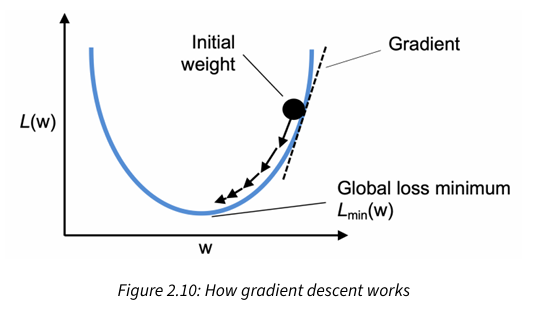

Gradient Descent is like water, it wants to flow to the lowest point

### Implementing the Adaline Learning Rule in Python

Similar to the perceptron rule, we should just need to change the fit method in the clas so the weight and bias params are updated minimizing the loss function via gradient descent.

In [ ]:
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # shape[1] is the number of columns
        self.b_ = np.float_(0.)
        self.losses_ = []

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    
    # pg 40
